In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [172]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
data.isna().mean().sort_values(ascending=False) # MISSING VALUE CHECK

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [175]:
data.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",'Id'],inplace=True,axis=1) # deletions of columns with several missing values

In [176]:
data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [178]:
data.isna().mean().sort_values(ascending=False) # check the nan values

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
                  ...   
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
MSZoning        0.000000
HeatingQC       0.000000
SalePrice       0.000000
Length: 75, dtype: float64

<AxesSubplot:>

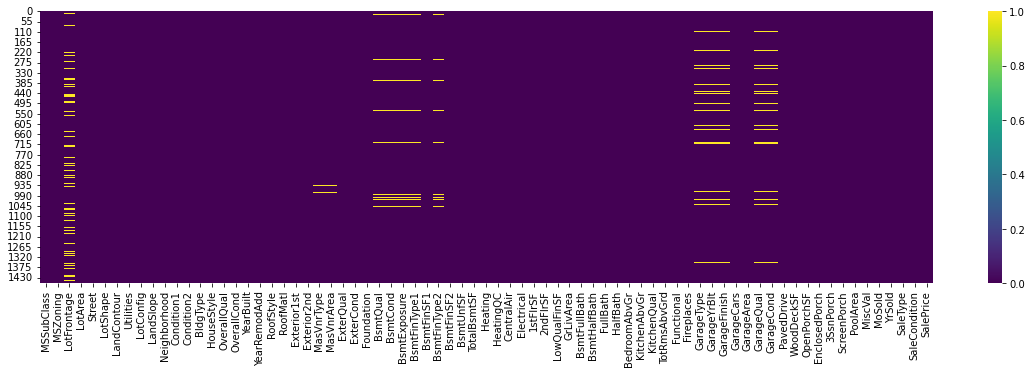

In [504]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isna(),cmap='viridis')

In [179]:
#we count the number of unique values to identify the categorical variables
for i in data.select_dtypes(include='object').columns:
    print(i,data[i].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


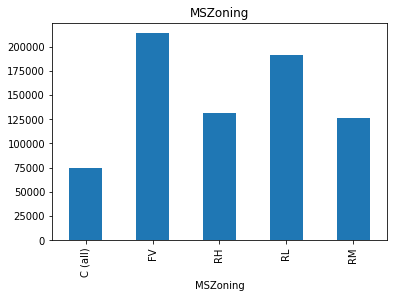

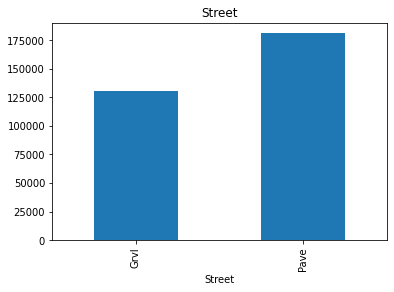

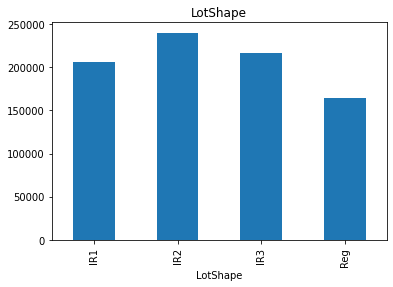

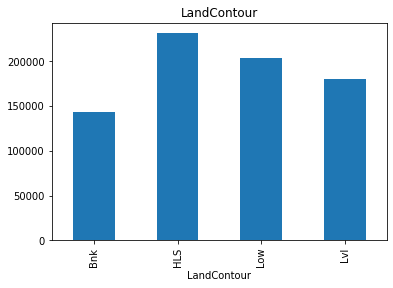

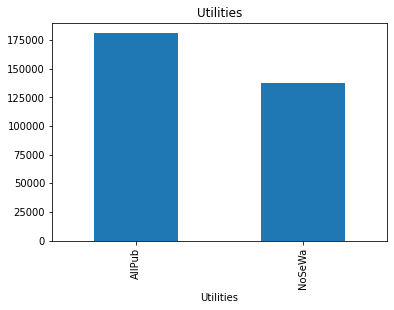

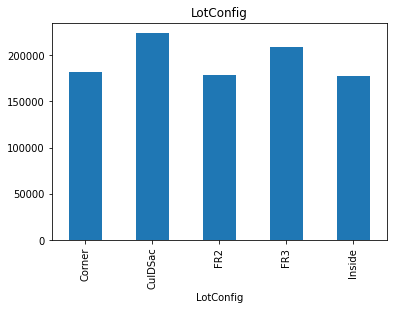

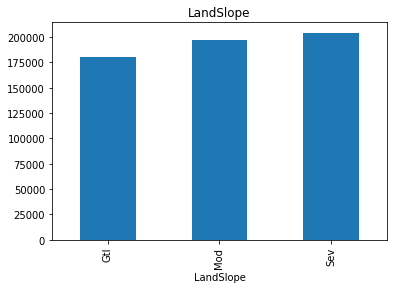

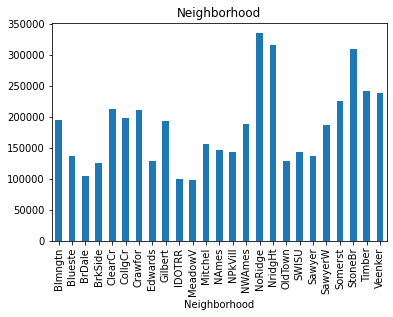

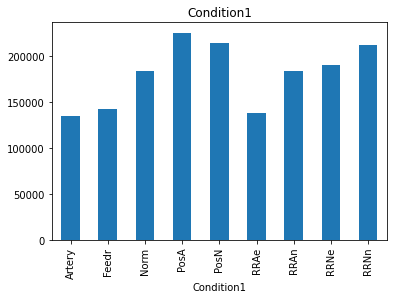

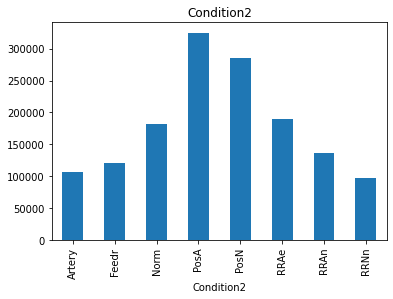

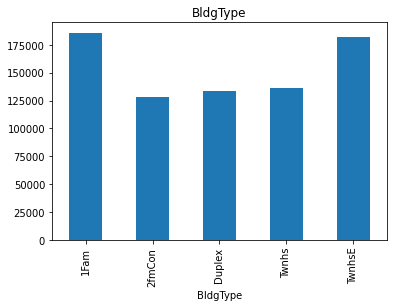

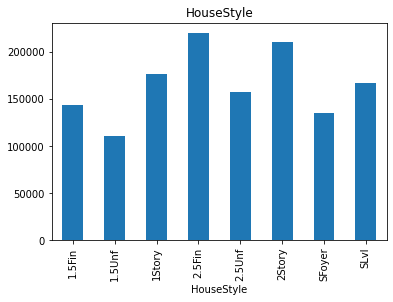

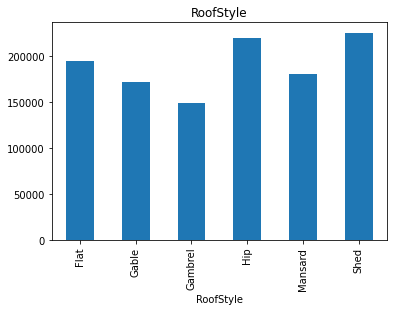

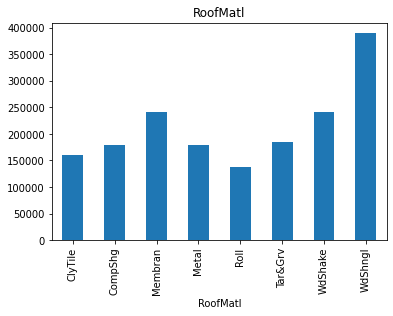

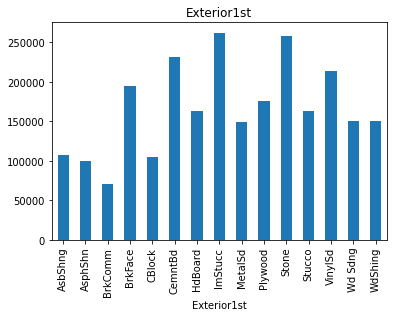

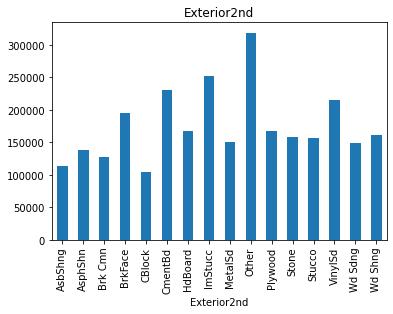

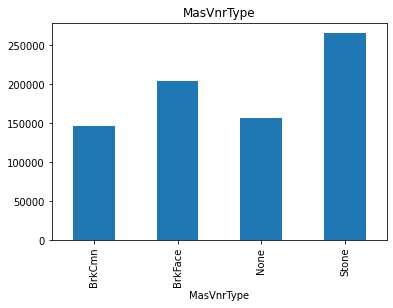

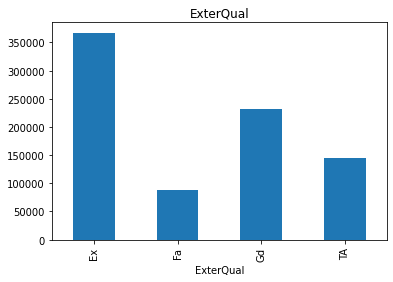

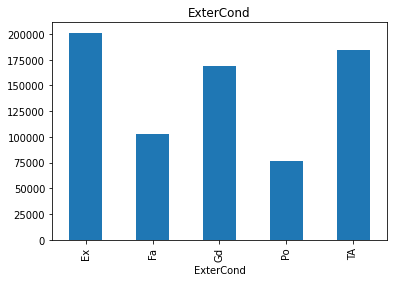

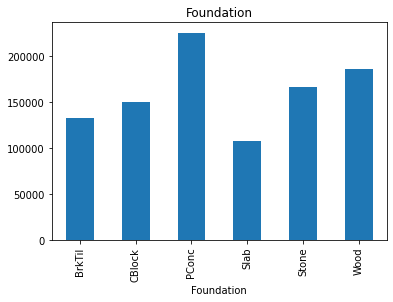

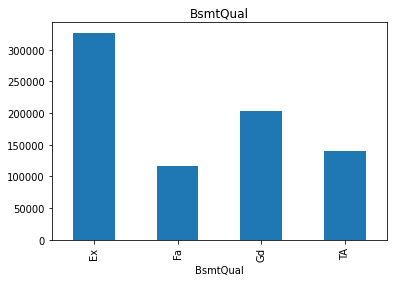

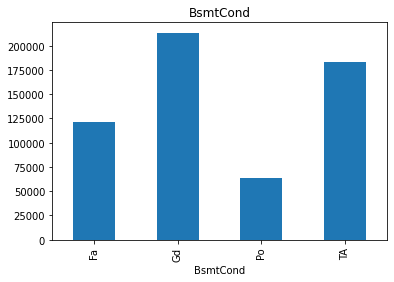

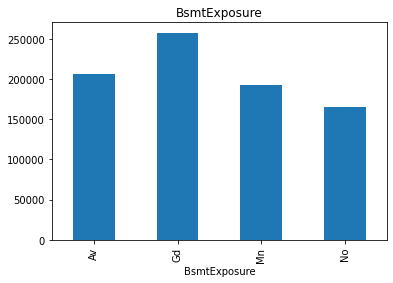

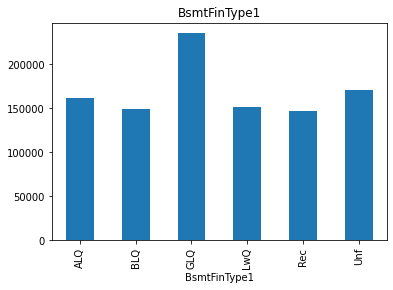

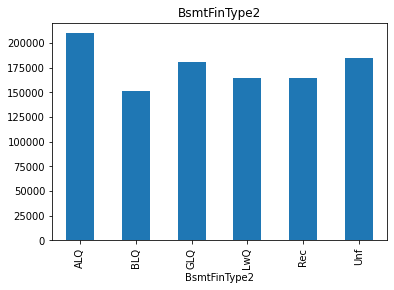

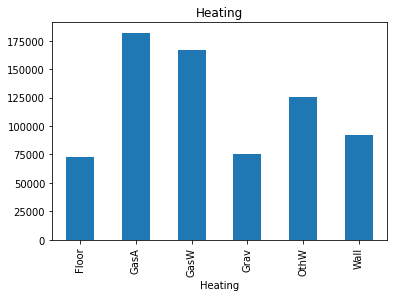

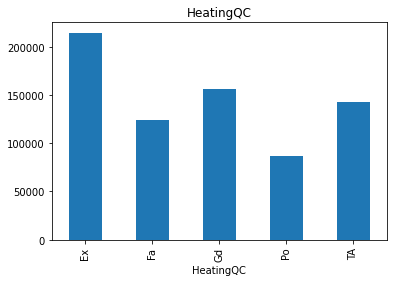

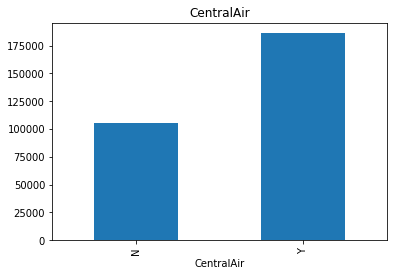

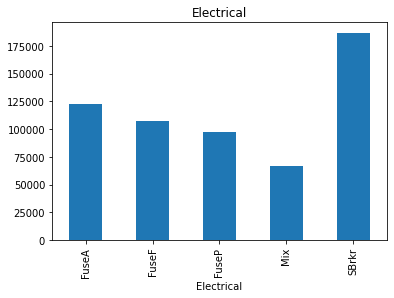

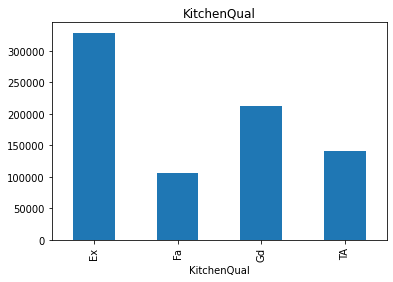

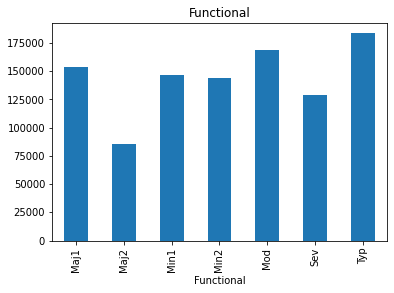

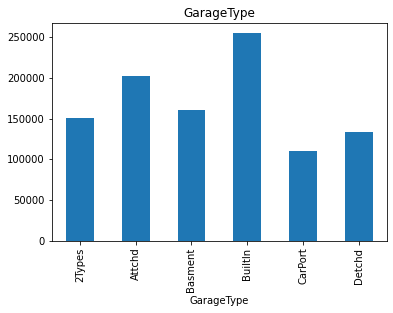

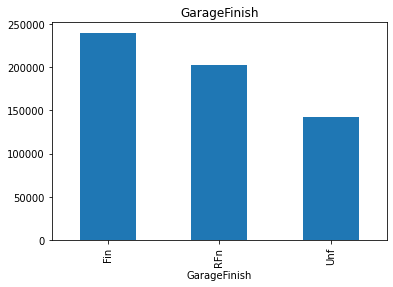

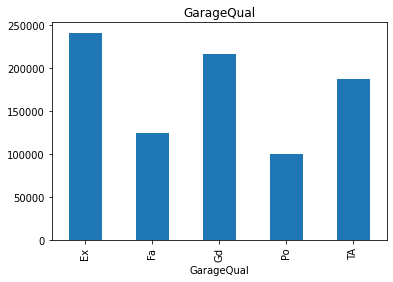

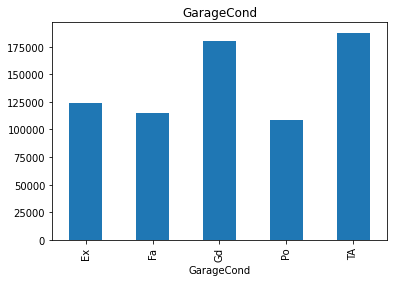

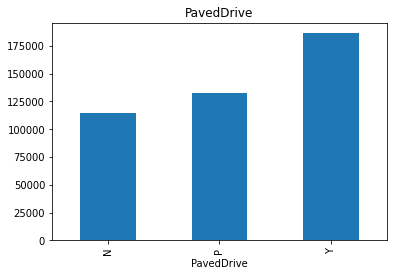

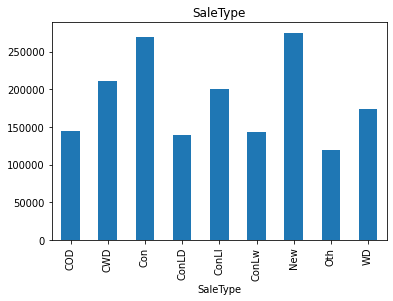

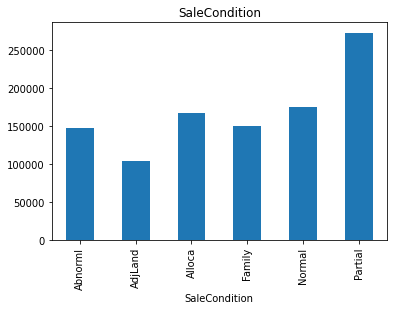

In [506]:
#analysis of the relationship between the explanatory variables and the prices to remove the variables having the least impact on the price
for i in data.select_dtypes(include='object'):
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.title(i)
    plt.show()

In [180]:
feature_drop2=['LotConfig','BsmtFinType1','GarageCond','LandSlope','GarageYrBlt','Exterior1st']
data.drop(feature_drop2,axis=1,inplace=True) # removal of columns with less impact on price and recurring variables

In [181]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [183]:
#selection of numeric variables
data_num=data[data.select_dtypes(exclude='object').columns].head(10)

data_num.head(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


In [184]:
#selection of numeric variables to check the number of unique values and select the variables to be transformed into categorical variables
for i in data_num.columns:
    if data[i].nunique() <20:
        print(i,data[i].nunique())

MSSubClass 15
OverallQual 10
OverallCond 9
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
PoolArea 8
MoSold 12
YrSold 5


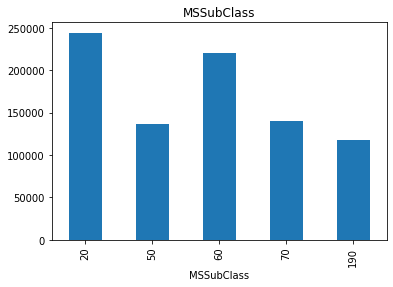

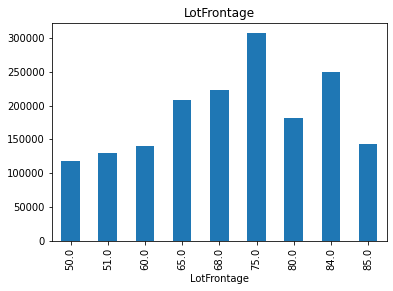

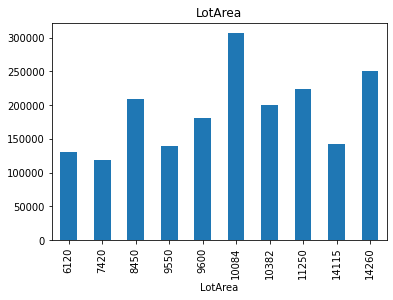

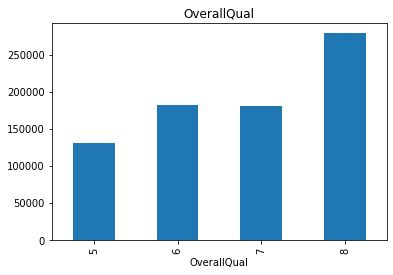

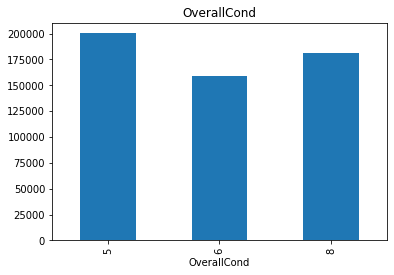

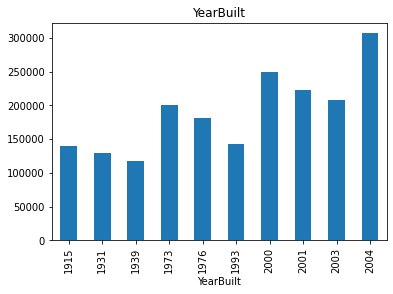

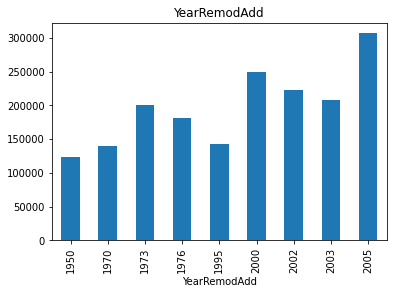

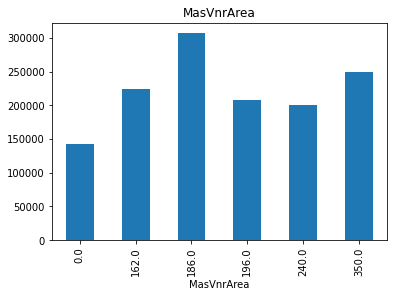

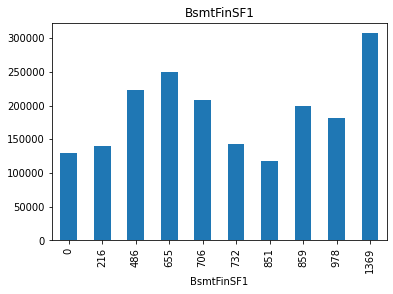

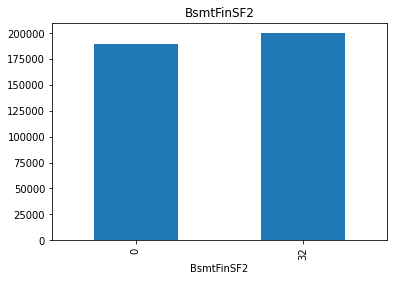

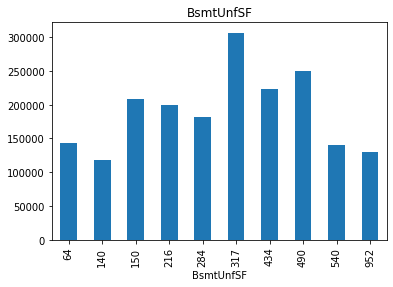

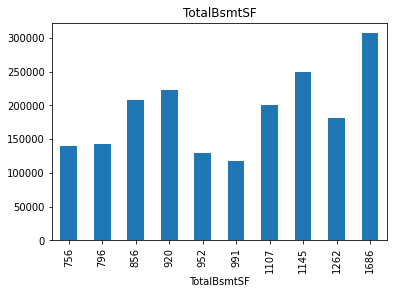

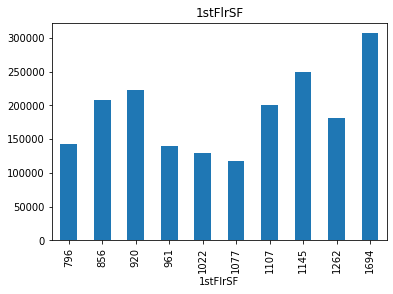

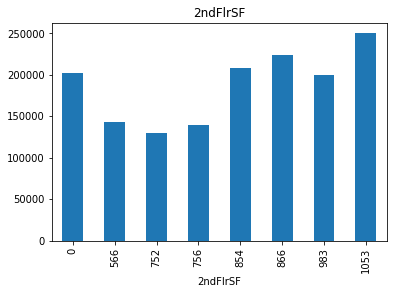

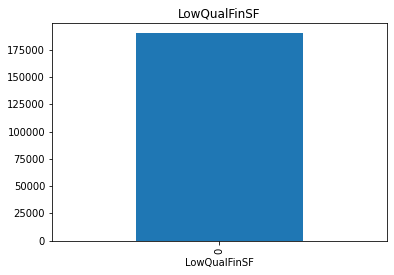

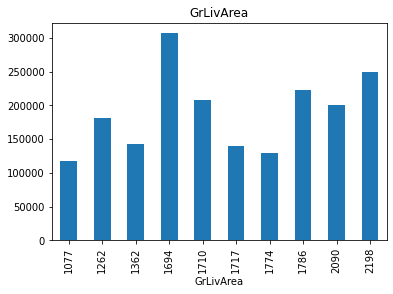

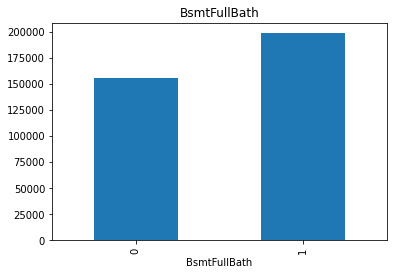

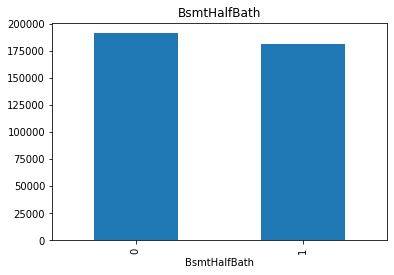

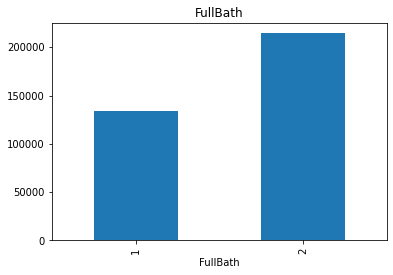

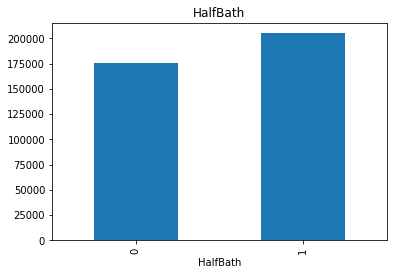

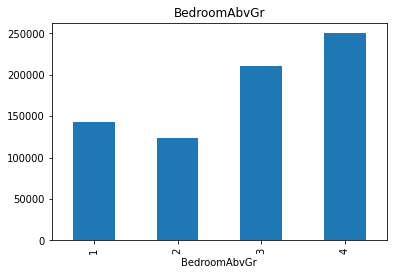

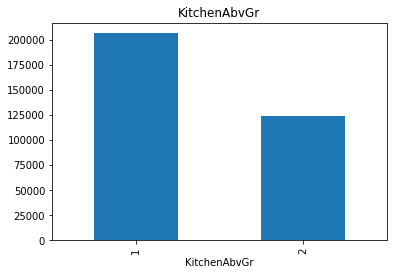

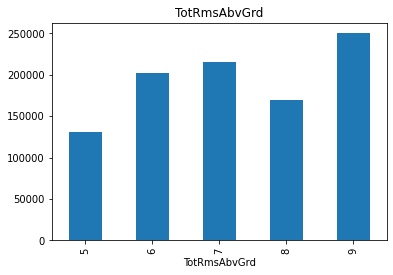

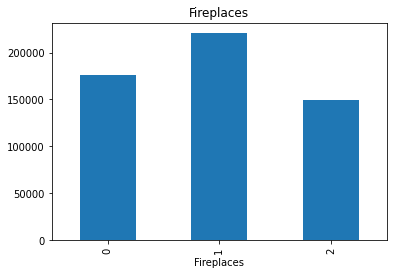

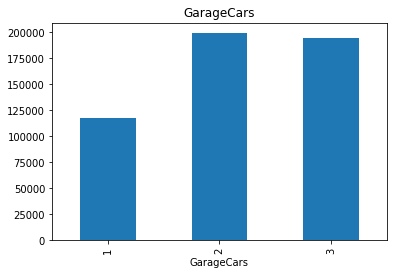

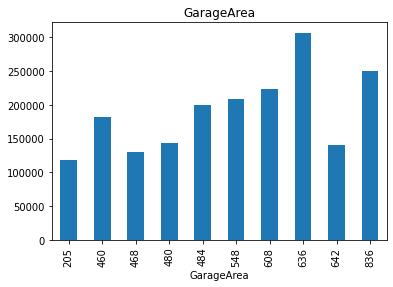

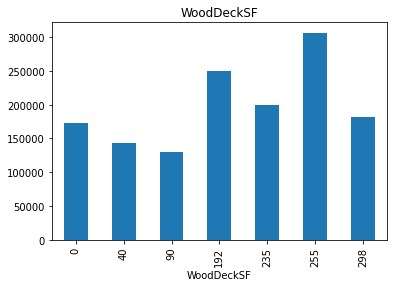

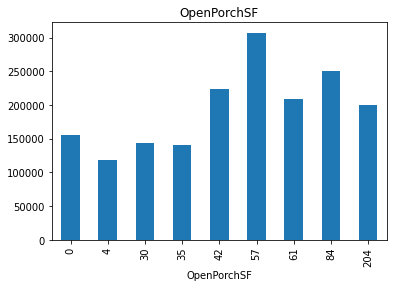

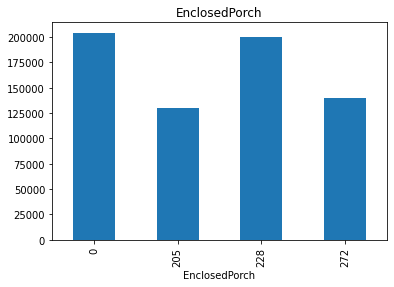

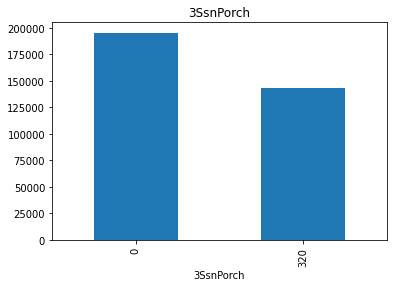

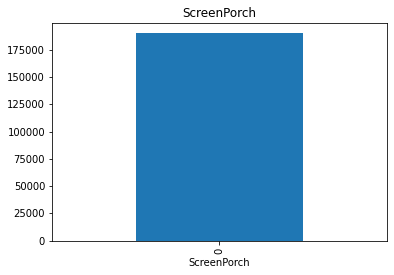

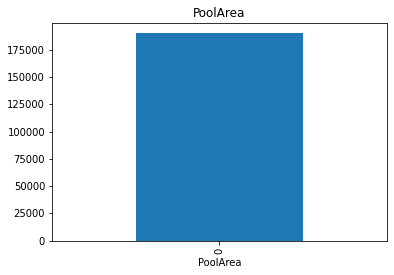

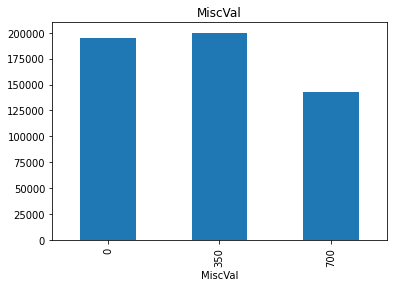

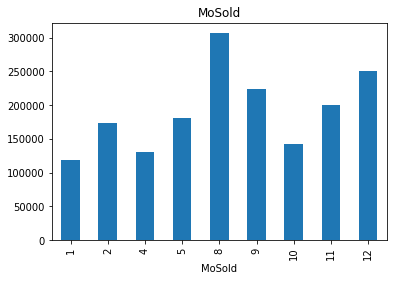

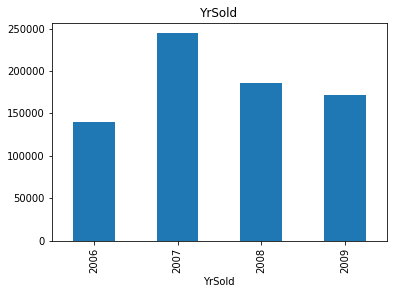

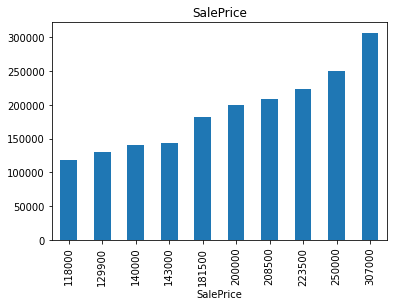

In [16]:
#analysis of the relationship between the numéric explanatory variables and the prices to remove the variables having the least impact on the price
for i in data_num.columns:
    data_num.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.title(i)
    plt.show()

<AxesSubplot:>

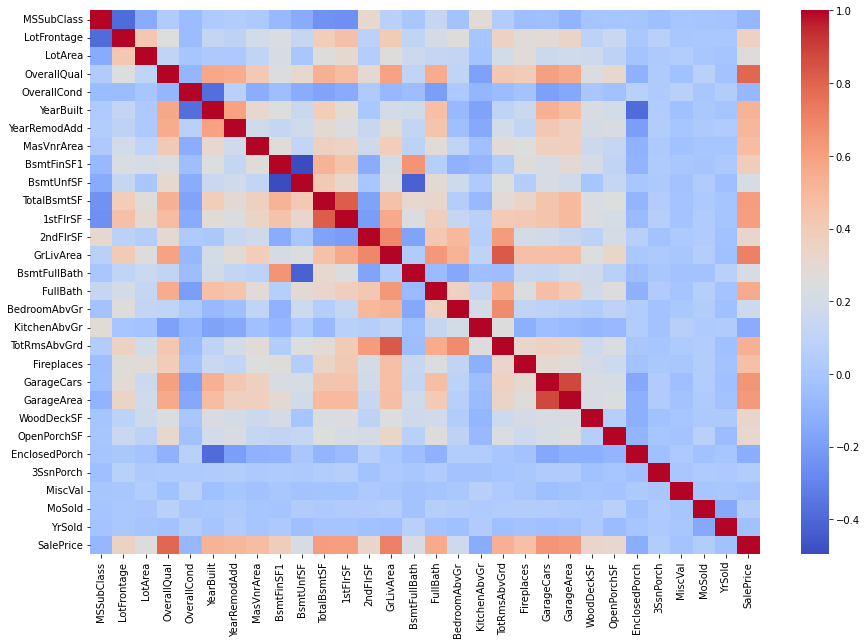

In [188]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='coolwarm')

In [185]:
feature_todrop3=["PoolArea","ScreenPorch","BsmtFinSF2",'BsmtHalfBath','LowQualFinSF','BsmtFinSF2',
                 'HalfBath']
data.drop(feature_todrop3,axis=1,inplace=True) ## dropping the variables considered without impact on prices or strongly correlated variables with others

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [187]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


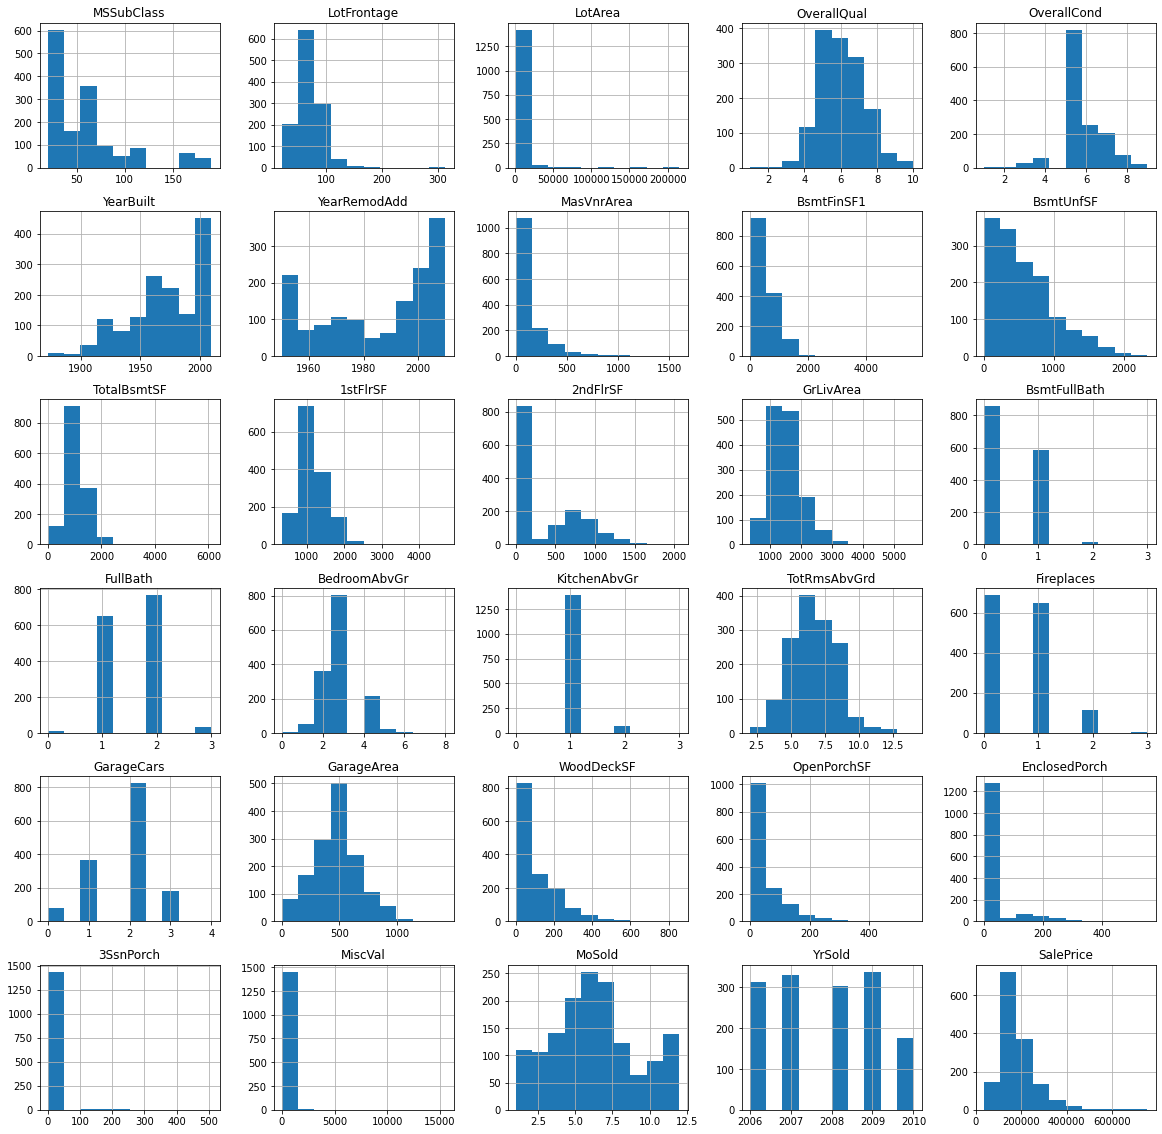

In [21]:
# data distribution analysis
data.hist(figsize=(20,20));

In [190]:
# analysis of the distribution of deals to remove highly unbalanced variables
feature_drop4=["MiscVal",'3SsnPorch','EnclosedPorch','KitchenAbvGr','YearRemodAdd','Heating','Condition1','GarageQual','Utilities']
data.drop(feature_drop4,axis=1,inplace=True)

In [191]:
data.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageType        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
BsmtFullBath       0
FullBath           0
BedroomAbvGr       0
GrLivArea          0
2ndFlrSF           0
KitchenQual        0
MSSubClass         0
Functional         0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
1stFlrSF           0
BsmtUnfSF          0
CentralAir         0
OverallCond        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Neighborhood       0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
HeatingQC          0
RoofStyle          0
RoofMatl           0
Exterior2nd        0
ExterQual    

# lists of explanatory variables selected for the construction of the model

In [192]:
usecol_traning=list(data.columns)[:-1] # we will use these columns for our test data
usecol_traning

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'RoofMatl',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

# classification in categorial and numerical data

In [20]:
#checking the number of unique values per column
for i in data.select_dtypes(include='object').columns:
    print(i,data[i].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
Neighborhood 25
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType2 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
GarageType 6
GarageFinish 3
PavedDrive 3
SaleType 9
SaleCondition 6


In [194]:
# variable to convert into categorical data
cat_var=[]
for i in data.select_dtypes(exclude='object').columns:
    if data[i].nunique()<20:
        cat_var.append(i)
        print(i)

MSSubClass
OverallQual
OverallCond
BsmtFullBath
FullBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
MoSold
YrSold


In [195]:
data.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageType        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
BsmtFullBath       0
FullBath           0
BedroomAbvGr       0
GrLivArea          0
2ndFlrSF           0
KitchenQual        0
MSSubClass         0
Functional         0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
1stFlrSF           0
BsmtUnfSF          0
CentralAir         0
OverallCond        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Neighborhood       0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
HeatingQC          0
RoofStyle          0
RoofMatl           0
Exterior2nd        0
ExterQual    

In [23]:
## filling the missing values
data['LotFrontage'].fillna(data.LotFrontage.median(),inplace=True)
data['Electrical'].fillna(data.Electrical.mode(),inplace=True)
data['MasVnrArea'].fillna(data.MasVnrArea.median(),inplace=True)

In [196]:
#the other data are considered missing NO
data.fillna('NA',inplace=True)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  OverallQual    1460 non-null   int64 
 12  OverallCond    1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  MasVnrArea     1460 non-null

In [361]:
df=data.copy() # creation of a copy

In [362]:
df[cat_var]=df[cat_var].astype('category')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,2,3,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,Veenker,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,2,3,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,CollgCr,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,2,3,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Crawfor,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,1,1,3,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,2,4,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,12,2008,WD,Normal,250000


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   object  
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Neighborhood   1460 non-null   object  
 8   Condition2     1460 non-null   object  
 9   BldgType       1460 non-null   object  
 10  HouseStyle     1460 non-null   object  
 11  OverallQual    1460 non-null   category
 12  OverallCond    1460 non-null   category
 13  YearBuilt      1460 non-null   int64   
 14  RoofStyle      1460 non-null   object  
 15  RoofMatl       1460 non-null   object  
 16  Exterior2nd    1460 non-null   object  
 17  MasVnrType     1460 non-null   ob

In [199]:
df_train_enc=df[cat_var]
df_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   BsmtFullBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   Fireplaces    1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   MoSold        1460 non-null   int64
 10  YrSold        1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [200]:
## deletion of categorial variables before transformation into dammies
df.drop(cat_var,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotFrontage    1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  YearBuilt      1460 non-null   int64 
 11  RoofStyle      1460 non-null   object
 12  RoofMatl       1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1460 non-null   object
 15  MasVnrArea     1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [201]:
#checking the reasonable number of unique values per column before dammies
for i in df.select_dtypes(include='object').columns:
    print(i,df[i].nunique())

MSZoning 5
LotFrontage 111
Street 2
LotShape 4
LandContour 4
Neighborhood 25
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
GarageType 7
GarageFinish 4
PavedDrive 3
SaleType 9
SaleCondition 6


In [35]:
df_dammies=pd.get_dummies(df,drop_first=True)
df_dammies.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,196.0,706,150,856,856,854,1710,548,0,61,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,460,298,0,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,162.0,486,434,920,920,866,1786,608,0,42,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,0.0,216,540,756,961,756,1717,642,0,35,140000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,

In [225]:
df_dammies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 182 entries, LotFrontage to YrSold
dtypes: float64(2), int64(23), uint8(157)
memory usage: 509.1 KB


In [223]:
df_dammies=pd.concat([df_dammies,df_train_enc],axis=1)

In [224]:
df_dammies.head(2)

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,65.0,8450,2003,196.0,706,150,856,856,854,1710,548,0,61,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,60,7,5,1,2,3,8,0,2,2,2008
1,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,460,298,0,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,20,6,8,0,2,3,6,1,2,5,2007


## suite pour demain

## Test Data

In [343]:
data_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',usecols=usecol_traning)
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,NAmes,Norm,1Fam,1Story,5,6,1961,Gable,CompShg,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,468.0,LwQ,270.0,882.0,TA,Y,SBrkr,896,0,896,0.0,1,2,TA,5,Typ,0,Attchd,Unf,1.0,730.0,Y,140,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,NAmes,Norm,1Fam,1Story,6,6,1958,Hip,CompShg,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,923.0,Unf,406.0,1329.0,TA,Y,SBrkr,1329,0,1329,0.0,1,3,Gd,6,Typ,0,Attchd,Unf,1.0,312.0,Y,393,36,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,Gilbert,Norm,1Fam,2Story,5,5,1997,Gable,CompShg,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,791.0,Unf,137.0,928.0,Gd,Y,SBrkr,928,701,1629,0.0,2,3,TA,6,Typ,1,Attchd,Fin,2.0,482.0,Y,212,34,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,Gilbert,Norm,1Fam,2Story,6,6,1998,Gable,CompShg,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,602.0,Unf,324.0,926.0,Ex,Y,SBrkr,926,678,1604,0.0,2,3,Gd,7,Typ,1,Attchd,Fin,2.0,470.0,Y,360,36,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,StoneBr,Norm,TwnhsE,1Story,8,5,1992,Gable,CompShg,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,263.0,Unf,1017.0,1280.0,Ex,Y,SBrkr,1280,0,1280,0.0,2,2,Gd,5,Typ,0,Attchd,RFn,2.0,506.0,Y,0,82,1,2010,WD,Normal


In [344]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition2     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  RoofMatl       1459 non-null   object 
 16  Exterior2nd    1458 non-null   object 
 17  MasVnrType     1443 non-null   object 
 18  MasVnrAr

In [345]:
data_test.isna().sum().sort_values(ascending=False)

LotFrontage      227
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenQual        1
Exterior2nd        1
GarageCars         1
GarageArea         1
SaleType           1
1stFlrSF           0
TotRmsAbvGrd       0
Fireplaces         0
BedroomAbvGr       0
FullBath           0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
MoSold             0
YrSold             0
GrLivArea          0
2ndFlrSF           0
MSSubClass         0
Electrical         0
CentralAir         0
LotArea            0
Street             0
LotShape           0
LandContour        0
Neighborhood       0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
RoofStyle          0
RoofMatl     

In [346]:
data_test['LotFrontage'].fillna(data_test.LotFrontage.median(),inplace=True)
data_test['Electrical'].fillna(data_test.Electrical.mode(),inplace=True)
data_test['MasVnrArea'].fillna(data_test.MasVnrArea.median(),inplace=True)
data_test['TotalBsmtSF'].fillna(data_test.TotalBsmtSF.median(),inplace=True)
data_test['BsmtFinSF1'].fillna(data_test.BsmtFinSF1.median(),inplace=True)
data_test['BsmtUnfSF'].fillna(data_test.BsmtUnfSF.median(),inplace=True)
data_test['GarageArea'].fillna(data_test.GarageArea.median(),inplace=True)
data_test['GarageCars'].fillna(data_test.GarageCars.median(),inplace=True)
data_test['BsmtFullBath'].fillna(data_test.GarageCars.median(),inplace=True)
data_test['OverallQual'].fillna(data_test.GarageCars.median(),inplace=True)

In [347]:
data_test.fillna('NA',inplace=True)

In [348]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition2     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  RoofMatl       1459 non-null   object 
 16  Exterior2nd    1459 non-null   object 
 17  MasVnrType     1459 non-null   object 
 18  MasVnrAr

In [422]:
df_test=data_test.copy()

In [423]:
df_test[cat_var]=df_test[cat_var]

In [424]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,NAmes,Norm,1Fam,1Story,5,6,1961,Gable,CompShg,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,468.0,LwQ,270.0,882.0,TA,Y,SBrkr,896,0,896,0.0,1,2,TA,5,Typ,0,Attchd,Unf,1.0,730.0,Y,140,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,NAmes,Norm,1Fam,1Story,6,6,1958,Hip,CompShg,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,923.0,Unf,406.0,1329.0,TA,Y,SBrkr,1329,0,1329,0.0,1,3,Gd,6,Typ,0,Attchd,Unf,1.0,312.0,Y,393,36,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,Gilbert,Norm,1Fam,2Story,5,5,1997,Gable,CompShg,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,791.0,Unf,137.0,928.0,Gd,Y,SBrkr,928,701,1629,0.0,2,3,TA,6,Typ,1,Attchd,Fin,2.0,482.0,Y,212,34,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,Gilbert,Norm,1Fam,2Story,6,6,1998,Gable,CompShg,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,602.0,Unf,324.0,926.0,Ex,Y,SBrkr,926,678,1604,0.0,2,3,Gd,7,Typ,1,Attchd,Fin,2.0,470.0,Y,360,36,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,StoneBr,Norm,TwnhsE,1Story,8,5,1992,Gable,CompShg,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,263.0,Unf,1017.0,1280.0,Ex,Y,SBrkr,1280,0,1280,0.0,2,2,Gd,5,Typ,0,Attchd,RFn,2.0,506.0,Y,0,82,1,2010,WD,Normal


In [425]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition2     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  RoofMatl       1459 non-null   object 
 16  Exterior2nd    1459 non-null   object 
 17  MasVnrType     1459 non-null   object 
 18  MasVnrAr

In [426]:
df_test_enc=df_test[cat_var].astype('int64')
df_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1459 non-null   int64
 1   OverallQual   1459 non-null   int64
 2   OverallCond   1459 non-null   int64
 3   BsmtFullBath  1459 non-null   int64
 4   FullBath      1459 non-null   int64
 5   BedroomAbvGr  1459 non-null   int64
 6   TotRmsAbvGrd  1459 non-null   int64
 7   Fireplaces    1459 non-null   int64
 8   GarageCars    1459 non-null   int64
 9   MoSold        1459 non-null   int64
 10  YrSold        1459 non-null   int64
dtypes: int64(11)
memory usage: 125.5 KB


In [427]:
df_test.drop(cat_var,axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition2     1459 non-null   object 
 8   BldgType       1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  YearBuilt      1459 non-null   int64  
 11  RoofStyle      1459 non-null   object 
 12  RoofMatl       1459 non-null   object 
 13  Exterior2nd    1459 non-null   object 
 14  MasVnrType     1459 non-null   object 
 15  MasVnrArea     1459 non-null   float64
 16  ExterQual      1459 non-null   object 
 17  ExterCond      1459 non-null   object 
 18  Foundati

In [428]:
df_test_dammies=pd.get_dummies(df_test,drop_first=True)

In [429]:
df_test_dammies=pd.concat([df_test_dammies,df_test_enc],axis=1) #############

## Selecting the same features for the train we use to build the model and the test

In [430]:
same_col=list(set(df_test_dammies.columns).intersection(set(df_dammies.columns)))
same_col

['Electrical_FuseP',
 'Neighborhood_MeadowV',
 'GarageArea',
 'BedroomAbvGr',
 'Neighborhood_Mitchel',
 'CentralAir_Y',
 'ExterCond_TA',
 'GarageFinish_NA',
 'Neighborhood_NridgHt',
 'RoofMatl_WdShake',
 'MSZoning_RM',
 'GarageType_Basment',
 'BldgType_TwnhsE',
 'GarageType_Attchd',
 'SaleType_ConLD',
 'Neighborhood_Edwards',
 'BsmtExposure_No',
 'BsmtFinType2_Rec',
 'BsmtFullBath',
 'Neighborhood_OldTown',
 'MSZoning_RH',
 'ExterQual_Fa',
 'Functional_Min1',
 'BsmtQual_TA',
 '2ndFlrSF',
 'BsmtFinType2_NA',
 'GarageFinish_RFn',
 'ExterCond_Gd',
 'Neighborhood_NWAmes',
 'BsmtFinType2_LwQ',
 'HeatingQC_Po',
 'Functional_Min2',
 'BsmtExposure_NA',
 'Neighborhood_SawyerW',
 'RoofMatl_Tar&Grv',
 'PavedDrive_P',
 'BldgType_Twnhs',
 'GarageFinish_Unf',
 'Condition2_PosA',
 'WoodDeckSF',
 'OverallQual',
 'GrLivArea',
 'HeatingQC_Gd',
 'BsmtExposure_Mn',
 'MSSubClass',
 'LandContour_Low',
 'MasVnrArea',
 'ExterCond_Po',
 'Condition2_Feedr',
 'GarageCars',
 'BsmtQual_NA',
 'Exterior2nd_Wd Shng',

In [431]:
df_test_final=df_test_dammies[same_col] ## the test data
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 170 entries, Electrical_FuseP to RoofStyle_Mansard
dtypes: float64(6), int64(18), uint8(146)
memory usage: 481.7 KB


In [432]:
df_train_final=df_dammies[same_col]
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 170 entries, Electrical_FuseP to RoofStyle_Mansard
dtypes: float64(2), int64(22), uint8(146)
memory usage: 482.0 KB


In [433]:
# we use the log price
new_price=np.log(data.SalePrice)
df_train_final['SalePrice']=new_price

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [434]:
df_train_final.head()

,Electrical_FuseP,Neighborhood_MeadowV,GarageArea,BedroomAbvGr,Neighborhood_Mitchel,CentralAir_Y,ExterCond_TA,GarageFinish_NA,Neighborhood_NridgHt,RoofMatl_WdShake,MSZoning_RM,GarageType_Basment,BldgType_TwnhsE,GarageType_Attchd,SaleType_ConLD,Neighborhood_Edwards,BsmtExposure_No,BsmtFinType2_Rec,BsmtFullBath,Neighborhood_OldTown,MSZoning_RH,ExterQual_Fa,Functional_Min1,BsmtQual_TA,2ndFlrSF,BsmtFinType2_NA,GarageFinish_RFn,ExterCond_Gd,Neighborhood_NWAmes,BsmtFinType2_LwQ,HeatingQC_Po,Functional_Min2,BsmtExposure_NA,Neighborhood_SawyerW,RoofMatl_Tar&Grv,PavedDrive_P,BldgType_Twnhs,GarageFinish_Unf,Condition2_PosA,WoodDeckSF,OverallQual,GrLivArea,HeatingQC_Gd,BsmtExposure_Mn,MSSubClass,LandContour_Low,MasVnrArea,ExterCond_Po,Condition2_Feedr,GarageCars,BsmtQual_NA,Exterior2nd_Wd Shng,MasVnrType_NA,MoSold,BsmtUnfSF,Exterior2nd_CBlock,Neighborhood_NoRidge,Condition2_PosN,Foundation_PConc,RoofMatl_WdShngl,Exterior2nd_Stucco,SaleType_Con,BsmtQual_Gd,Functional_Sev,SaleType_New,HouseStyle_SLvl,HouseStyle_1.5Unf,LotShape_Reg,MasVnrType_BrkFace,SaleType_Oth,Neighborhood_ClearCr,SaleType_ConLI,Foundation_CBlock,LotFrontage,Functional_Typ,SaleCondition_Family,Exterior2nd_Wd Sdng,HeatingQC_TA,SaleCondition_Normal,Neighborhood_Veenker,Electrical_SBrkr,Neighborhood_Sawyer,SaleCondition_Alloca,SaleCondition_AdjLand,TotalBsmtSF,BsmtExposure_Gd,Neighborhood_Gilbert,Neighborhood_Blueste,HouseStyle_SFoyer,Foundation_Wood,GarageType_CarPort,BsmtCond_Gd,LandContour_HLS,RoofStyle_Gable,Neighborhood_BrDale,RoofStyle_Gambrel,ExterQual_TA,GarageType_Detchd,Fireplaces,GarageType_NA,Exterior2nd_HdBoard,Functional_Mod,Electrical_FuseF,Neighborhood_Somerst,BsmtCond_TA,HouseStyle_2Story,1stFlrSF,BldgType_Duplex,Exterior2nd_VinylSd,ExterCond_Fa,KitchenQual_Gd,Neighborhood_BrkSide,Street_Pave,Neighborhood_Timber,OpenPorchSF,HouseStyle_1Story,SaleCondition_Partial,MasVnrType_None,Exterior2nd_Plywood,SaleType_CWD,Foundation_Slab,Exterior2nd_ImStucc,PavedDrive_Y,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_Unf,ExterQual_Gd,BsmtFinSF1,Neighborhood_NAmes,KitchenQual_TA,LotShape_IR3,Exterior2nd_AsphShn,Neighborhood_CollgCr,TotRmsAbvGrd,RoofStyle_Shed,Foundation_Stone,MSZoning_FV,Functional_Maj2,OverallCond,HeatingQC_Fa,SaleType_ConLw,Exterior2nd_Brk Cmn,FullBath,Neighborhood_StoneBr,SaleType_WD,Neighborhood_IDOTRR,KitchenQual_Fa,LotArea,Neighborhood_SWISU,Exterior2nd_BrkFace,YearBuilt,Exterior2nd_MetalSd,Condition2_Norm,BsmtFinType2_GLQ,RoofStyle_Hip,Exterior2nd_Stone,LotShape_IR2,LandContour_Lvl,Neighborhood_NPkVill,BldgType_2fmCon,HouseStyle_2.5Unf,MasVnrType_Stone,Exterior2nd_CmentBd,BsmtFinType2_BLQ,YrSold,BsmtCond_NA,GarageType_BuiltIn,BsmtCond_Po,BsmtQual_Fa,RoofStyle_Mansard,SalePrice
0,0,0,548,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,854,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1710,0,0,60,0,196.0,0,0,2,0,0,0,2,150,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,65.0,1,0,0,0,1,0,1,0,0,0,856,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,856,0,1,0,1,0,1,0,61,0,0,0,0,0,0,0,1,0,1,1,1,706,0,0,0,0,1,8,0,0,0,0,5,0,0,0,2,0,1,0,0,8450,0,0,2003,0,1,0,0,0,0,1,0,0,0,0,0,0,2008,0,0,0,0,0,12.247694
1,0,0,460,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,298,6,1262,0,0,20,0,0.0,0,0,2,0,0,0,5,284,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,80.0,1,0,0,0,1,1,1,0,0,0,1262,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1262,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,978,0,1,0,0,0,6,0,0,0,0,8,0,0,0,2,0,1,0,0,9600,0,0,1976,1,1,0,0,0,0,1,0,0,0,0,0,0,2007,0,0,0,0,0,12.109011
2,0,0,608,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,866,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1786,0,1,60,0,162.0,0,0,2,0,0,0,9,434,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,68.0,1,0,0,0,1,0,1,0,0,0,920,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,920,0,1,0,1,0,1,0,42,0,0,0,0,0,0,0,1,0,1,1,1,486,0,0,0,0,1,6,0,0,0,0,5,0,0,0,2,0,1,0,0,11250,0,0,2001,0,1,0,0,0,0,1,0,0,0,0,0,0,2008,0,0,0,0,0,12.317167
3,0,0,642,3,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,756,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,1717,1,0,70,0,0.0,0,0,3,0,1,0,2,540,0,0,0,0,0,0,0,0,

In [435]:
df_test_final.head()

,Electrical_FuseP,Neighborhood_MeadowV,GarageArea,BedroomAbvGr,Neighborhood_Mitchel,CentralAir_Y,ExterCond_TA,GarageFinish_NA,Neighborhood_NridgHt,RoofMatl_WdShake,MSZoning_RM,GarageType_Basment,BldgType_TwnhsE,GarageType_Attchd,SaleType_ConLD,Neighborhood_Edwards,BsmtExposure_No,BsmtFinType2_Rec,BsmtFullBath,Neighborhood_OldTown,MSZoning_RH,ExterQual_Fa,Functional_Min1,BsmtQual_TA,2ndFlrSF,BsmtFinType2_NA,GarageFinish_RFn,ExterCond_Gd,Neighborhood_NWAmes,BsmtFinType2_LwQ,HeatingQC_Po,Functional_Min2,BsmtExposure_NA,Neighborhood_SawyerW,RoofMatl_Tar&Grv,PavedDrive_P,BldgType_Twnhs,GarageFinish_Unf,Condition2_PosA,WoodDeckSF,OverallQual,GrLivArea,HeatingQC_Gd,BsmtExposure_Mn,MSSubClass,LandContour_Low,MasVnrArea,ExterCond_Po,Condition2_Feedr,GarageCars,BsmtQual_NA,Exterior2nd_Wd Shng,MasVnrType_NA,MoSold,BsmtUnfSF,Exterior2nd_CBlock,Neighborhood_NoRidge,Condition2_PosN,Foundation_PConc,RoofMatl_WdShngl,Exterior2nd_Stucco,SaleType_Con,BsmtQual_Gd,Functional_Sev,SaleType_New,HouseStyle_SLvl,HouseStyle_1.5Unf,LotShape_Reg,MasVnrType_BrkFace,SaleType_Oth,Neighborhood_ClearCr,SaleType_ConLI,Foundation_CBlock,LotFrontage,Functional_Typ,SaleCondition_Family,Exterior2nd_Wd Sdng,HeatingQC_TA,SaleCondition_Normal,Neighborhood_Veenker,Electrical_SBrkr,Neighborhood_Sawyer,SaleCondition_Alloca,SaleCondition_AdjLand,TotalBsmtSF,BsmtExposure_Gd,Neighborhood_Gilbert,Neighborhood_Blueste,HouseStyle_SFoyer,Foundation_Wood,GarageType_CarPort,BsmtCond_Gd,LandContour_HLS,RoofStyle_Gable,Neighborhood_BrDale,RoofStyle_Gambrel,ExterQual_TA,GarageType_Detchd,Fireplaces,GarageType_NA,Exterior2nd_HdBoard,Functional_Mod,Electrical_FuseF,Neighborhood_Somerst,BsmtCond_TA,HouseStyle_2Story,1stFlrSF,BldgType_Duplex,Exterior2nd_VinylSd,ExterCond_Fa,KitchenQual_Gd,Neighborhood_BrkSide,Street_Pave,Neighborhood_Timber,OpenPorchSF,HouseStyle_1Story,SaleCondition_Partial,MasVnrType_None,Exterior2nd_Plywood,SaleType_CWD,Foundation_Slab,Exterior2nd_ImStucc,PavedDrive_Y,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_Unf,ExterQual_Gd,BsmtFinSF1,Neighborhood_NAmes,KitchenQual_TA,LotShape_IR3,Exterior2nd_AsphShn,Neighborhood_CollgCr,TotRmsAbvGrd,RoofStyle_Shed,Foundation_Stone,MSZoning_FV,Functional_Maj2,OverallCond,HeatingQC_Fa,SaleType_ConLw,Exterior2nd_Brk Cmn,FullBath,Neighborhood_StoneBr,SaleType_WD,Neighborhood_IDOTRR,KitchenQual_Fa,LotArea,Neighborhood_SWISU,Exterior2nd_BrkFace,YearBuilt,Exterior2nd_MetalSd,Condition2_Norm,BsmtFinType2_GLQ,RoofStyle_Hip,Exterior2nd_Stone,LotShape_IR2,LandContour_Lvl,Neighborhood_NPkVill,BldgType_2fmCon,HouseStyle_2.5Unf,MasVnrType_Stone,Exterior2nd_CmentBd,BsmtFinType2_BLQ,YrSold,BsmtCond_NA,GarageType_BuiltIn,BsmtCond_Po,BsmtQual_Fa,RoofStyle_Mansard
0,0,0,730.0,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,140,5,896,0,0,20,0,0.0,0,0,1,0,0,0,6,270.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,80.0,1,0,0,1,1,0,1,0,0,0,882.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,896,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,468.0,1,1,0,0,0,5,0,0,0,0,6,0,0,0,1,0,1,0,0,11622,0,0,1961,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
1,0,0,312.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,393,6,1329,0,0,20,0,108.0,0,0,1,0,0,0,6,406.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,81.0,1,0,1,1,1,0,1,0,0,0,1329.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1329,0,0,0,1,0,1,0,36,1,0,0,0,0,0,0,1,0,1,1,0,923.0,1,0,0,0,0,6,0,0,0,0,6,0,0,0,1,0,1,0,0,14267,0,0,1958,0,1,0,1,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
2,0,0,482.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,5,1629,1,0,60,0,0.0,0,0,2,0,0,0,3,137.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,74.0,1,0,0,0,1,0,1,0,0,0,928.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,928,0,1,0,0,0,1,0,34,0,0,1,0,0,0,0,1,0,1,1,0,791.0,0,1,0,0,0,6,0,0,0,0,5,0,0,0,2,0,1,0,0,13830,0,0,1997,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
3,0,0,470.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360,6,1604,0,0,60,0,20.0,0,0,2,0,0,0,6,324.0,0,0,0,1,0,0,0,0,0,0,0,0,

## Log transformation

In [436]:
##  verification of null value before using the log
col_testlog=[]

for i in df_test_final.columns:
    if df_test_final[i].describe().min()>0:
        col_testlog.append(i)
print(col_testlog)
    

['OverallQual', 'GrLivArea', 'MSSubClass', 'MoSold', 'LotFrontage', '1stFlrSF', 'TotRmsAbvGrd', 'OverallCond', 'LotArea', 'YearBuilt', 'YrSold']


In [437]:
col_trainlog=[]

for i in df_train_final.columns:
    if df_train_final[i].describe().min()>0:
        col_trainlog.append(i)
print(col_trainlog)

['OverallQual', 'GrLivArea', 'MSSubClass', 'MoSold', 'LotFrontage', '1stFlrSF', 'TotRmsAbvGrd', 'OverallCond', 'LotArea', 'YearBuilt', 'YrSold', 'SalePrice']


In [438]:
col_tolog=['LotFrontage', '1stFlrSF', 'GrLivArea', 'LotArea']

In [439]:
df_test_log=df_test_final.copy()
df_train_log=df_train_final.copy()

In [440]:
df_test_final[col_tolog]=np.log(df_test_log[col_tolog])
df_train_final[col_tolog]=np.log(df_train_log[col_tolog])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [441]:
df_train_final.head()

,Electrical_FuseP,Neighborhood_MeadowV,GarageArea,BedroomAbvGr,Neighborhood_Mitchel,CentralAir_Y,ExterCond_TA,GarageFinish_NA,Neighborhood_NridgHt,RoofMatl_WdShake,MSZoning_RM,GarageType_Basment,BldgType_TwnhsE,GarageType_Attchd,SaleType_ConLD,Neighborhood_Edwards,BsmtExposure_No,BsmtFinType2_Rec,BsmtFullBath,Neighborhood_OldTown,MSZoning_RH,ExterQual_Fa,Functional_Min1,BsmtQual_TA,2ndFlrSF,BsmtFinType2_NA,GarageFinish_RFn,ExterCond_Gd,Neighborhood_NWAmes,BsmtFinType2_LwQ,HeatingQC_Po,Functional_Min2,BsmtExposure_NA,Neighborhood_SawyerW,RoofMatl_Tar&Grv,PavedDrive_P,BldgType_Twnhs,GarageFinish_Unf,Condition2_PosA,WoodDeckSF,OverallQual,GrLivArea,HeatingQC_Gd,BsmtExposure_Mn,MSSubClass,LandContour_Low,MasVnrArea,ExterCond_Po,Condition2_Feedr,GarageCars,BsmtQual_NA,Exterior2nd_Wd Shng,MasVnrType_NA,MoSold,BsmtUnfSF,Exterior2nd_CBlock,Neighborhood_NoRidge,Condition2_PosN,Foundation_PConc,RoofMatl_WdShngl,Exterior2nd_Stucco,SaleType_Con,BsmtQual_Gd,Functional_Sev,SaleType_New,HouseStyle_SLvl,HouseStyle_1.5Unf,LotShape_Reg,MasVnrType_BrkFace,SaleType_Oth,Neighborhood_ClearCr,SaleType_ConLI,Foundation_CBlock,LotFrontage,Functional_Typ,SaleCondition_Family,Exterior2nd_Wd Sdng,HeatingQC_TA,SaleCondition_Normal,Neighborhood_Veenker,Electrical_SBrkr,Neighborhood_Sawyer,SaleCondition_Alloca,SaleCondition_AdjLand,TotalBsmtSF,BsmtExposure_Gd,Neighborhood_Gilbert,Neighborhood_Blueste,HouseStyle_SFoyer,Foundation_Wood,GarageType_CarPort,BsmtCond_Gd,LandContour_HLS,RoofStyle_Gable,Neighborhood_BrDale,RoofStyle_Gambrel,ExterQual_TA,GarageType_Detchd,Fireplaces,GarageType_NA,Exterior2nd_HdBoard,Functional_Mod,Electrical_FuseF,Neighborhood_Somerst,BsmtCond_TA,HouseStyle_2Story,1stFlrSF,BldgType_Duplex,Exterior2nd_VinylSd,ExterCond_Fa,KitchenQual_Gd,Neighborhood_BrkSide,Street_Pave,Neighborhood_Timber,OpenPorchSF,HouseStyle_1Story,SaleCondition_Partial,MasVnrType_None,Exterior2nd_Plywood,SaleType_CWD,Foundation_Slab,Exterior2nd_ImStucc,PavedDrive_Y,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_Unf,ExterQual_Gd,BsmtFinSF1,Neighborhood_NAmes,KitchenQual_TA,LotShape_IR3,Exterior2nd_AsphShn,Neighborhood_CollgCr,TotRmsAbvGrd,RoofStyle_Shed,Foundation_Stone,MSZoning_FV,Functional_Maj2,OverallCond,HeatingQC_Fa,SaleType_ConLw,Exterior2nd_Brk Cmn,FullBath,Neighborhood_StoneBr,SaleType_WD,Neighborhood_IDOTRR,KitchenQual_Fa,LotArea,Neighborhood_SWISU,Exterior2nd_BrkFace,YearBuilt,Exterior2nd_MetalSd,Condition2_Norm,BsmtFinType2_GLQ,RoofStyle_Hip,Exterior2nd_Stone,LotShape_IR2,LandContour_Lvl,Neighborhood_NPkVill,BldgType_2fmCon,HouseStyle_2.5Unf,MasVnrType_Stone,Exterior2nd_CmentBd,BsmtFinType2_BLQ,YrSold,BsmtCond_NA,GarageType_BuiltIn,BsmtCond_Po,BsmtQual_Fa,RoofStyle_Mansard,SalePrice
0,0,0,548,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,854,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7.444249,0,0,60,0,196.0,0,0,2,0,0,0,2,150,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,4.174387,1,0,0,0,1,0,1,0,0,0,856,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,6.752270,0,1,0,1,0,1,0,61,0,0,0,0,0,0,0,1,0,1,1,1,706,0,0,0,0,1,8,0,0,0,0,5,0,0,0,2,0,1,0,0,9.041922,0,0,2003,0,1,0,0,0,0,1,0,0,0,0,0,0,2008,0,0,0,0,0,12.247694
1,0,0,460,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,298,6,7.140453,0,0,20,0,0.0,0,0,2,0,0,0,5,284,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4.382027,1,0,0,0,1,1,1,0,0,0,1262,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,7.140453,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,978,0,1,0,0,0,6,0,0,0,0,8,0,0,0,2,0,1,0,0,9.169518,0,0,1976,1,1,0,0,0,0,1,0,0,0,0,0,0,2007,0,0,0,0,0,12.109011
2,0,0,608,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,866,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7.487734,0,1,60,0,162.0,0,0,2,0,0,0,9,434,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,4.219508,1,0,0,0,1,0,1,0,0,0,920,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,6.824374,0,1,0,1,0,1,0,42,0,0,0,0,0,0,0,1,0,1,1,1,486,0,0,0,0,1,6,0,0,0,0,5,0,0,0,2,0,1,0,0,9.328123,0,0,2001,0,1,0,0,0,0,1,0,0,0,0,0,0,2008,0,0,0,0,0,12.317167
3,0,0,642,3,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,756,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,7.4

In [442]:
df_test_final.head()

,Electrical_FuseP,Neighborhood_MeadowV,GarageArea,BedroomAbvGr,Neighborhood_Mitchel,CentralAir_Y,ExterCond_TA,GarageFinish_NA,Neighborhood_NridgHt,RoofMatl_WdShake,MSZoning_RM,GarageType_Basment,BldgType_TwnhsE,GarageType_Attchd,SaleType_ConLD,Neighborhood_Edwards,BsmtExposure_No,BsmtFinType2_Rec,BsmtFullBath,Neighborhood_OldTown,MSZoning_RH,ExterQual_Fa,Functional_Min1,BsmtQual_TA,2ndFlrSF,BsmtFinType2_NA,GarageFinish_RFn,ExterCond_Gd,Neighborhood_NWAmes,BsmtFinType2_LwQ,HeatingQC_Po,Functional_Min2,BsmtExposure_NA,Neighborhood_SawyerW,RoofMatl_Tar&Grv,PavedDrive_P,BldgType_Twnhs,GarageFinish_Unf,Condition2_PosA,WoodDeckSF,OverallQual,GrLivArea,HeatingQC_Gd,BsmtExposure_Mn,MSSubClass,LandContour_Low,MasVnrArea,ExterCond_Po,Condition2_Feedr,GarageCars,BsmtQual_NA,Exterior2nd_Wd Shng,MasVnrType_NA,MoSold,BsmtUnfSF,Exterior2nd_CBlock,Neighborhood_NoRidge,Condition2_PosN,Foundation_PConc,RoofMatl_WdShngl,Exterior2nd_Stucco,SaleType_Con,BsmtQual_Gd,Functional_Sev,SaleType_New,HouseStyle_SLvl,HouseStyle_1.5Unf,LotShape_Reg,MasVnrType_BrkFace,SaleType_Oth,Neighborhood_ClearCr,SaleType_ConLI,Foundation_CBlock,LotFrontage,Functional_Typ,SaleCondition_Family,Exterior2nd_Wd Sdng,HeatingQC_TA,SaleCondition_Normal,Neighborhood_Veenker,Electrical_SBrkr,Neighborhood_Sawyer,SaleCondition_Alloca,SaleCondition_AdjLand,TotalBsmtSF,BsmtExposure_Gd,Neighborhood_Gilbert,Neighborhood_Blueste,HouseStyle_SFoyer,Foundation_Wood,GarageType_CarPort,BsmtCond_Gd,LandContour_HLS,RoofStyle_Gable,Neighborhood_BrDale,RoofStyle_Gambrel,ExterQual_TA,GarageType_Detchd,Fireplaces,GarageType_NA,Exterior2nd_HdBoard,Functional_Mod,Electrical_FuseF,Neighborhood_Somerst,BsmtCond_TA,HouseStyle_2Story,1stFlrSF,BldgType_Duplex,Exterior2nd_VinylSd,ExterCond_Fa,KitchenQual_Gd,Neighborhood_BrkSide,Street_Pave,Neighborhood_Timber,OpenPorchSF,HouseStyle_1Story,SaleCondition_Partial,MasVnrType_None,Exterior2nd_Plywood,SaleType_CWD,Foundation_Slab,Exterior2nd_ImStucc,PavedDrive_Y,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_Unf,ExterQual_Gd,BsmtFinSF1,Neighborhood_NAmes,KitchenQual_TA,LotShape_IR3,Exterior2nd_AsphShn,Neighborhood_CollgCr,TotRmsAbvGrd,RoofStyle_Shed,Foundation_Stone,MSZoning_FV,Functional_Maj2,OverallCond,HeatingQC_Fa,SaleType_ConLw,Exterior2nd_Brk Cmn,FullBath,Neighborhood_StoneBr,SaleType_WD,Neighborhood_IDOTRR,KitchenQual_Fa,LotArea,Neighborhood_SWISU,Exterior2nd_BrkFace,YearBuilt,Exterior2nd_MetalSd,Condition2_Norm,BsmtFinType2_GLQ,RoofStyle_Hip,Exterior2nd_Stone,LotShape_IR2,LandContour_Lvl,Neighborhood_NPkVill,BldgType_2fmCon,HouseStyle_2.5Unf,MasVnrType_Stone,Exterior2nd_CmentBd,BsmtFinType2_BLQ,YrSold,BsmtCond_NA,GarageType_BuiltIn,BsmtCond_Po,BsmtQual_Fa,RoofStyle_Mansard
0,0,0,730.0,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,140,5,6.797940,0,0,20,0,0.0,0,0,1,0,0,0,6,270.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4.382027,1,0,0,1,1,0,1,0,0,0,882.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,6.797940,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,468.0,1,1,0,0,0,5,0,0,0,0,6,0,0,0,1,0,1,0,0,9.360655,0,0,1961,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
1,0,0,312.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,393,6,7.192182,0,0,20,0,108.0,0,0,1,0,0,0,6,406.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4.394449,1,0,1,1,1,0,1,0,0,0,1329.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,7.192182,0,0,0,1,0,1,0,36,1,0,0,0,0,0,0,1,0,1,1,0,923.0,1,0,0,0,0,6,0,0,0,0,6,0,0,0,1,0,1,0,0,9.565704,0,0,1958,0,1,0,1,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
2,0,0,482.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,5,7.395722,1,0,60,0,0.0,0,0,2,0,0,0,3,137.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.304065,1,0,0,0,1,0,1,0,0,0,928.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,6.833032,0,1,0,0,0,1,0,34,0,0,1,0,0,0,0,1,0,1,1,0,791.0,0,1,0,0,0,6,0,0,0,0,5,0,0,0,2,0,1,0,0,9.534595,0,0,1997,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
3,0,0,470.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360,6,7.380256,0,0,60

In [443]:
#checking the number of columns and dtypes
print(df_test_final.info())
print(df_train_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 170 entries, Electrical_FuseP to RoofStyle_Mansard
dtypes: float64(9), int64(15), uint8(146)
memory usage: 481.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 171 entries, Electrical_FuseP to SalePrice
dtypes: float64(6), int64(19), uint8(146)
memory usage: 493.4 KB
None


# Scaling the data

In [444]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [445]:
X=df_train_final.drop('SalePrice',axis=1)
y=df_train_final['SalePrice']

In [446]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,test_size=0.05)

In [447]:
scaler=MinMaxScaler().fit(X_train)

In [448]:
X_train_sc=scaler.transform(X_train)
X_val_sc=scaler.transform(X_val)

In [449]:
RFC=RandomForestRegressor(random_state=42, n_estimators=1000).fit(X_train_sc,y_train)

In [450]:
print(RFC.score(X_train_sc,y_train))
print(RFC.score(X_val_sc,y_val))

0.9826398380385951
0.9267176498979468


In [451]:
np.sqrt(mean_squared_error(np.exp(y_val),np.exp(RFC.predict(X_val_sc))))

21914.753829106572

In [452]:
(np.exp(y_val)).describe()

count        73.000000
mean     176414.904110
std       74639.641334
min       68500.000000
25%      119500.000000
50%      153900.000000
75%      213000.000000
max      451950.000000
Name: SalePrice, dtype: float64

In [496]:
GBR=GradientBoostingRegressor(random_state=0, n_estimators=55).fit(X_train_sc,y_train)

In [497]:
print(GBR.score(X_train_sc,y_train))
print(GBR.score(X_val_sc,y_val))
np.sqrt(mean_squared_error(np.exp(y_val),np.exp(GBR.predict(X_val_sc))))

0.9376748543552628
0.943255842676098


18629.686199096253

In [505]:
#Hyperparameter tuning
param_distributions = {
    "n_estimators": [50,55,65,70,80,90,100]}
search_cv = GridSearchCV(
    GradientBoostingRegressor(random_state=0), param_grid=param_distributions, n_jobs=-1,cv=10)
search_cv.fit(X_train_sc,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 55, 65, 70, 80, 90, 100]})

In [506]:
search_cv.best_params_

{'n_estimators': 100}

In [507]:
print(search_cv.score(X_train_sc,y_train))
print(search_cv.score(X_val_sc,y_val))
np.sqrt(mean_squared_error(np.exp(y_val),np.exp(search_cv.predict(X_val_sc))))

0.9545410823949018
0.9432325160739786


19193.864917382765

<Figure size 1800x360 with 0 Axes>

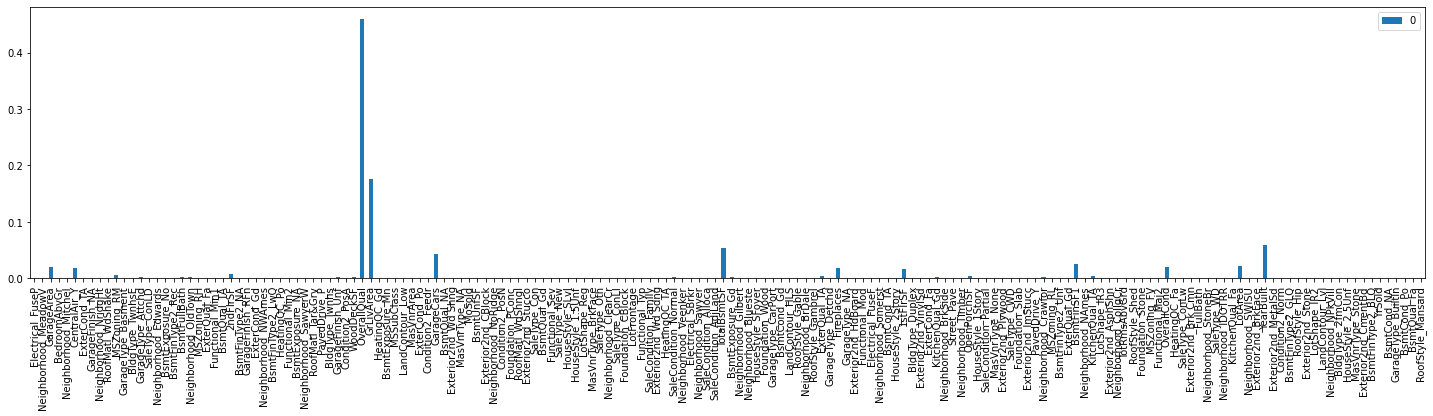

In [411]:
plt.figure(figsize=(25,5))
(pd.DataFrame(GBR.feature_importances_,index=X_train.columns)).plot(kind='bar',figsize=(25,5));

<Figure size 1800x360 with 0 Axes>

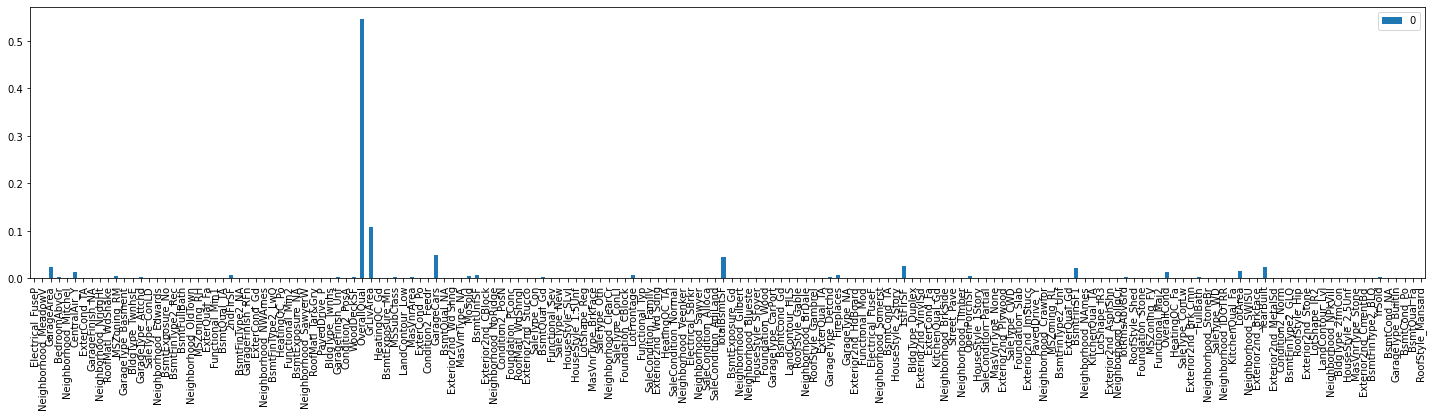

In [412]:
plt.figure(figsize=(25,5))
(pd.DataFrame(RFC.feature_importances_,index=X_train.columns)).plot(kind='bar',figsize=(25,5));

## Prediction of test data

In [508]:
df_test_final.head()

,Electrical_FuseP,Neighborhood_MeadowV,GarageArea,BedroomAbvGr,Neighborhood_Mitchel,CentralAir_Y,ExterCond_TA,GarageFinish_NA,Neighborhood_NridgHt,RoofMatl_WdShake,MSZoning_RM,GarageType_Basment,BldgType_TwnhsE,GarageType_Attchd,SaleType_ConLD,Neighborhood_Edwards,BsmtExposure_No,BsmtFinType2_Rec,BsmtFullBath,Neighborhood_OldTown,MSZoning_RH,ExterQual_Fa,Functional_Min1,BsmtQual_TA,2ndFlrSF,BsmtFinType2_NA,GarageFinish_RFn,ExterCond_Gd,Neighborhood_NWAmes,BsmtFinType2_LwQ,HeatingQC_Po,Functional_Min2,BsmtExposure_NA,Neighborhood_SawyerW,RoofMatl_Tar&Grv,PavedDrive_P,BldgType_Twnhs,GarageFinish_Unf,Condition2_PosA,WoodDeckSF,OverallQual,GrLivArea,HeatingQC_Gd,BsmtExposure_Mn,MSSubClass,LandContour_Low,MasVnrArea,ExterCond_Po,Condition2_Feedr,GarageCars,BsmtQual_NA,Exterior2nd_Wd Shng,MasVnrType_NA,MoSold,BsmtUnfSF,Exterior2nd_CBlock,Neighborhood_NoRidge,Condition2_PosN,Foundation_PConc,RoofMatl_WdShngl,Exterior2nd_Stucco,SaleType_Con,BsmtQual_Gd,Functional_Sev,SaleType_New,HouseStyle_SLvl,HouseStyle_1.5Unf,LotShape_Reg,MasVnrType_BrkFace,SaleType_Oth,Neighborhood_ClearCr,SaleType_ConLI,Foundation_CBlock,LotFrontage,Functional_Typ,SaleCondition_Family,Exterior2nd_Wd Sdng,HeatingQC_TA,SaleCondition_Normal,Neighborhood_Veenker,Electrical_SBrkr,Neighborhood_Sawyer,SaleCondition_Alloca,SaleCondition_AdjLand,TotalBsmtSF,BsmtExposure_Gd,Neighborhood_Gilbert,Neighborhood_Blueste,HouseStyle_SFoyer,Foundation_Wood,GarageType_CarPort,BsmtCond_Gd,LandContour_HLS,RoofStyle_Gable,Neighborhood_BrDale,RoofStyle_Gambrel,ExterQual_TA,GarageType_Detchd,Fireplaces,GarageType_NA,Exterior2nd_HdBoard,Functional_Mod,Electrical_FuseF,Neighborhood_Somerst,BsmtCond_TA,HouseStyle_2Story,1stFlrSF,BldgType_Duplex,Exterior2nd_VinylSd,ExterCond_Fa,KitchenQual_Gd,Neighborhood_BrkSide,Street_Pave,Neighborhood_Timber,OpenPorchSF,HouseStyle_1Story,SaleCondition_Partial,MasVnrType_None,Exterior2nd_Plywood,SaleType_CWD,Foundation_Slab,Exterior2nd_ImStucc,PavedDrive_Y,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_Unf,ExterQual_Gd,BsmtFinSF1,Neighborhood_NAmes,KitchenQual_TA,LotShape_IR3,Exterior2nd_AsphShn,Neighborhood_CollgCr,TotRmsAbvGrd,RoofStyle_Shed,Foundation_Stone,MSZoning_FV,Functional_Maj2,OverallCond,HeatingQC_Fa,SaleType_ConLw,Exterior2nd_Brk Cmn,FullBath,Neighborhood_StoneBr,SaleType_WD,Neighborhood_IDOTRR,KitchenQual_Fa,LotArea,Neighborhood_SWISU,Exterior2nd_BrkFace,YearBuilt,Exterior2nd_MetalSd,Condition2_Norm,BsmtFinType2_GLQ,RoofStyle_Hip,Exterior2nd_Stone,LotShape_IR2,LandContour_Lvl,Neighborhood_NPkVill,BldgType_2fmCon,HouseStyle_2.5Unf,MasVnrType_Stone,Exterior2nd_CmentBd,BsmtFinType2_BLQ,YrSold,BsmtCond_NA,GarageType_BuiltIn,BsmtCond_Po,BsmtQual_Fa,RoofStyle_Mansard
0,0,0,730.0,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,140,5,6.797940,0,0,20,0,0.0,0,0,1,0,0,0,6,270.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4.382027,1,0,0,1,1,0,1,0,0,0,882.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,6.797940,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,468.0,1,1,0,0,0,5,0,0,0,0,6,0,0,0,1,0,1,0,0,9.360655,0,0,1961,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
1,0,0,312.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,393,6,7.192182,0,0,20,0,108.0,0,0,1,0,0,0,6,406.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4.394449,1,0,1,1,1,0,1,0,0,0,1329.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,7.192182,0,0,0,1,0,1,0,36,1,0,0,0,0,0,0,1,0,1,1,0,923.0,1,0,0,0,0,6,0,0,0,0,6,0,0,0,1,0,1,0,0,9.565704,0,0,1958,0,1,0,1,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
2,0,0,482.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,5,7.395722,1,0,60,0,0.0,0,0,2,0,0,0,3,137.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.304065,1,0,0,0,1,0,1,0,0,0,928.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,6.833032,0,1,0,0,0,1,0,34,0,0,1,0,0,0,0,1,0,1,1,0,791.0,0,1,0,0,0,6,0,0,0,0,5,0,0,0,2,0,1,0,0,9.534595,0,0,1997,0,1,0,0,0,0,1,0,0,0,0,0,0,2010,0,0,0,0,0
3,0,0,470.0,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360,6,7.380256,0,0,60

In [520]:
df_test_sc=scaler.transform(df_test_final)

In [521]:
prev=np.exp(search_cv.predict(df_test_sc))

In [522]:
pd.DataFrame(prev).describe()

,0
count,1459.000000
mean,177349.694314
std,74659.991693
min,47343.156963
25%,128756.565981
50%,156536.127480
75%,206532.437293
max,568717.805227


In [523]:
Id=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',usecols=[0])

In [524]:
Soumission=pd.DataFrame(prev,index=Id.Id,columns=['SalePrice'])
Soumission.reset_index(inplace=True)
Soumission.head()

,Id,SalePrice
0,1461,126464.546665
1,1462,152882.590759
2,1463,176163.984317
3,1464,185129.230907
4,1465,197419.326098


In [525]:
Soumission.to_csv('ma_sumissionf1.csv',index=False)
## score 0.13349